### Scientific Notebook of Aye Aye Project Update 23.08.2024 <br>
In this Notebook data is preprocessed  by the LEK_data_grouped. to use this you need to install Numpy, Pandas, sklearn, xgboost, seaborn and shap **[using conda or pip package manager]**. <br>
-<br>
Steps: 1- Preprocessing Gender, Region, Agegroup, edu.level as the primary sociodemological data. Encoding the aforementioned columns 


In [194]:
### TODO: ADD ALL THE SAME GROUP COLUMNS INTO THE MODELS
### TODO: Prediction with each model, choose highest model prediction accuracy.
### TODO: LIME (Local Interpretable Model-agnostic Explanations)

In [181]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import spearmanr
import shap
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance



In [182]:
### 0. Importing data ###
dataraw = pd.read_csv(r'\Users\yazda\Desktop\AyeAye2024\Aye-Aye-Project\data\LEK\Modified_LEK.csv', delimiter=';')
dataraw.head(10)

,Survey.sheet,Clove.benefit.score,Region,Gender,Age,edu.level,Ethnic.group,Migration.Experience,Farms.Cloves,encountered.binary,...,Diet.Insects,Knowledge.signs,Remoteness,village.size,Farms.Paddy.Rice,Farms.Tavy.Rice,Extracts.Medical.plants,ID.vis.Indri,ID.vis.Microcebus,Aye.aye.protected
0,1,1,0,1,51-60,NaN,1,0,1,0,...,1,0,1,4,1,0,1,1,1,1
1,2,1,0,1,51-60,High,1,0,1,0,...,1,1,1,4,1,0,1,1,1,1
2,3,1,0,1,41-50,Primary,1,0,1,0,...,0,0,1,4,1,1,1,1,1,1
3,4,1,0,1,51-60,Secondary,1,0,1,1,...,1,0,1,4,1,1,0,1,1,1
4,5,0,0,0,51-60,Primary,1,0,0,0,...,0,0,1,4,1,0,1,1,1,1
5,6,0,0,0,41-50,Primary,1,0,1,0,...,1,0,1,4,1,0,0,0,1,1
6,7,1,0,1,51-60,Primary,1,0,1,0,...,1,0,1,4,1,1,1,0,1,1
7,8,1,0,1,21-30,NaN,1,0,1,0,...,0,0,1,4,1,0,0,1,1,1
8,9,0,0,1,41-50,Primary,1,0,1,0,...,1,0,1,4,1,0,1,0,0,1
9,10,0,0,1,14-20,High,1,0,0,0,...,0,0,1,4,1,0,1,0,0,0


In [183]:
dataraw = pd.read_csv(r'\Users\yazda\Desktop\AyeAye2024\Aye-Aye-Project\data\LEK\Modified_LEK.csv', delimiter=';')
df = pd.DataFrame(dataraw)
df.fillna(0)
df_int = df.select_dtypes(include='int64')  # Select integer columns
# print(df_int.columns)
df[df_int.columns] = df_int + 1  # Add 1 to those columns
def preprocess_data_with_one_hot_encoding(data):
    # Set 'survey sheet' as the index
    data.set_index('Survey.sheet', inplace=True)

    # gender_categories = ['Male', 'Female']
    # region_categories = ['A', 'B', 'C', 'X']
    # agegroup_categories = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '>70']
    # edu_level_categories = ['1', '2', '3', '4']  # Assuming these correspond to None, Primary, Secondary, High

    # Encode columns with specific categories
    data['Gender'] = data['Gender'].replace({1: 'Female', 2: 'Male'})
    data['Region'] = data['Region'].replace({1: 'X', 2: 'A', 3: 'B', 4: 'C'})
    data['Age'] = data['Age'].replace({
        1: '11-20', 
        2: '21-30', 
        3: '31-40', 
        4: '41-50', 
        5: '51-60', 
        6: '61-70', 
        7: '>70'
    })
    data['edu.level'] = data['edu.level'].fillna('No')
    data['edu.level'] = data['edu.level'].replace({'No': '1', 'Primary': '2', 'Secondary': '3', 'High': '4'})



    # Exclude the target column from one-hot encoding
    if 'Clove.benefit.score' in data.columns:
        target = data['Clove.benefit.score']
        data.drop('Clove.benefit.score', axis=1, inplace=True)

        # Ensure all categories are included in the one-hot encoding
    data = pd.get_dummies(data, columns=['Gender', 'Region', 'Age', 'edu.level'], 
                          drop_first=False, 
                          dtype=int,
                          prefix_sep='_', )

    return data, target
print(df.columns)
data_encoded, target = preprocess_data_with_one_hot_encoding(df)
print(data_encoded.columns)
print(target)


Index(['Survey.sheet', 'Clove.benefit.score', 'Region', 'Gender', 'Age',
       'edu.level', 'Ethnic.group', 'Migration.Experience', 'Farms.Cloves',
       'encountered.binary', 'ID.vis.Aye', 'ID.nom',
       'Knowledge.non.benefit.score.max.6', 'DK.score', 'Diet.Insects',
       'Knowledge.signs', 'Remoteness', 'village.size', 'Farms.Paddy.Rice',
       'Farms.Tavy.Rice', 'Extracts.Medical.plants', 'ID.vis.Indri',
       'ID.vis.Microcebus', 'Aye.aye.protected'],
      dtype='object')
Index(['Ethnic.group', 'Migration.Experience', 'Farms.Cloves',
       'encountered.binary', 'ID.vis.Aye', 'ID.nom',
       'Knowledge.non.benefit.score.max.6', 'DK.score', 'Diet.Insects',
       'Knowledge.signs', 'Remoteness', 'village.size', 'Farms.Paddy.Rice',
       'Farms.Tavy.Rice', 'Extracts.Medical.plants', 'ID.vis.Indri',
       'ID.vis.Microcebus', 'Aye.aye.protected', 'Gender_Female',
       'Gender_Male', 'Region_A', 'Region_B', 'Region_C', 'Region_X',
       'Age_14-20', 'Age_21-30', 'Age_31

### Spearman Correlation with Target Column (With/without DK.score)



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



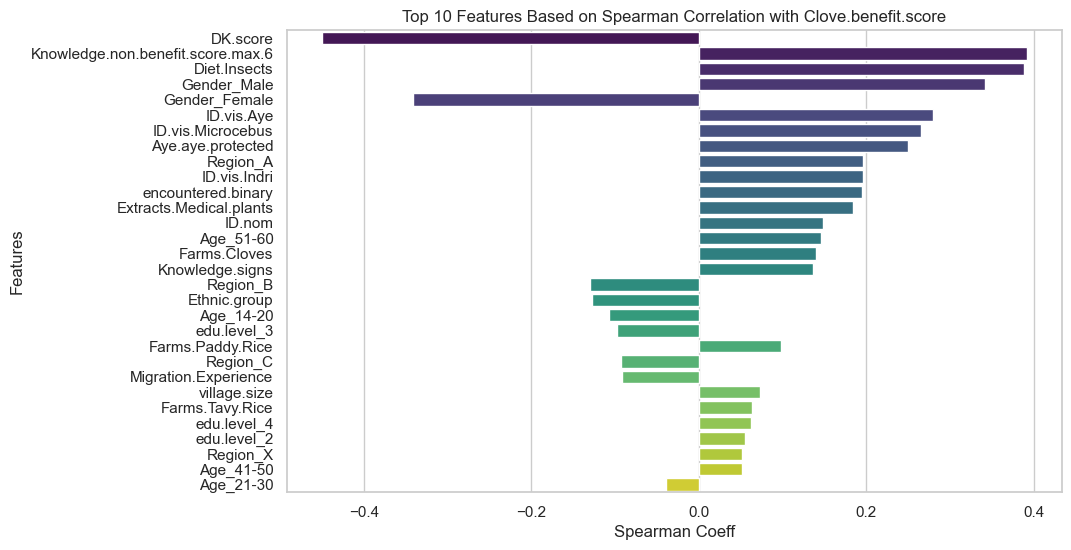

In [184]:
# Step 1: Calculate Spearman correlation with the target
spearman_corr = data_encoded.apply(lambda x: spearmanr(x, target)[0])

# Step 2: Select top features based on Spearman correlation
top_features = spearman_corr.abs().sort_values(ascending=False).index[:30]  # Top 30 features
top_spearman_corr = spearman_corr[top_features]

# Step 3: Plot the Spearman correlation values for the top features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_spearman_corr.values, y=top_spearman_corr.index, palette="viridis")
plt.title('Top 10 Features Based on Spearman Correlation with Clove.benefit.score')
plt.xlabel('Spearman Coeff')
plt.ylabel('Features')
plt.show()

In [185]:
top_spearman_corr

DK.score                            -0.450332
Knowledge.non.benefit.score.max.6    0.391551
Diet.Insects                         0.388766
Gender_Male                          0.341434
Gender_Female                       -0.341434
ID.vis.Aye                           0.280184
ID.vis.Microcebus                    0.265376
Aye.aye.protected                    0.249511
Region_A                             0.196610
ID.vis.Indri                         0.195830
encountered.binary                   0.194617
Extracts.Medical.plants              0.184300
ID.nom                               0.147828
Age_51-60                            0.146414
Farms.Cloves                         0.140299
Knowledge.signs                      0.136833
Region_B                            -0.130634
Ethnic.group                        -0.128074
Age_14-20                           -0.107586
edu.level_3                         -0.098305
Farms.Paddy.Rice                     0.098073
Region_C                          



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



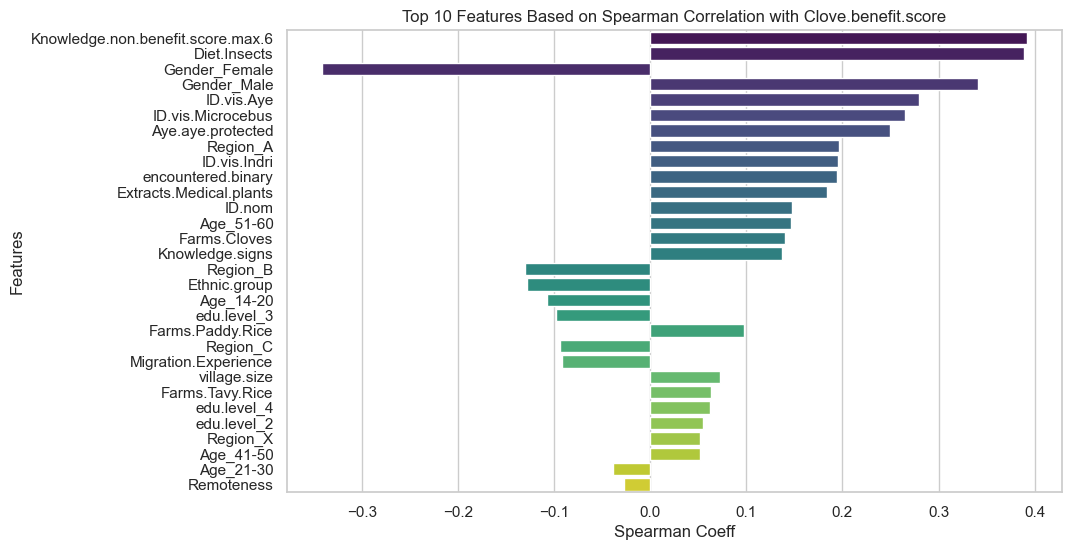

In [186]:
# Step 0: remove 
X = data_encoded.drop(columns=['DK.score'])
# Step 1: Calculate Spearman correlation with the target
spearman_corr = X.apply(lambda x: spearmanr(x, target)[0])
# Step 2: Select top features based on Spearman correlation
top_features = spearman_corr.abs().sort_values(ascending=False).index[:30]  # Top 10 features
top_spearman_corr = spearman_corr[top_features]

# Step 3: Plot the Spearman correlation values for the top features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_spearman_corr.values, y=top_spearman_corr.index, palette="viridis")
plt.title('Top 10 Features Based on Spearman Correlation with Clove.benefit.score')
plt.xlabel('Spearman Coeff')
plt.ylabel('Features')
plt.show()

### Training Logistic Regression and Feature Importance based on LR 

Logistic Regression Feature Importance:
Aye.aye.protected                    0.535800
Region_A                             0.473188
Diet.Insects                         0.360817
Farms.Cloves                         0.319017
ID.nom                               0.304901
Gender_Male                          0.295157
ID.vis.Microcebus                    0.259256
Knowledge.non.benefit.score.max.6    0.199945
Extracts.Medical.plants              0.188433
ID.vis.Aye                           0.168410
Age_51-60                            0.166568
ID.vis.Indri                         0.100426
Region_X                            -0.011847
Region_C                            -0.237829
encountered.binary                  -0.258557
Region_B                            -0.264591
Gender_Female                       -0.295157
dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



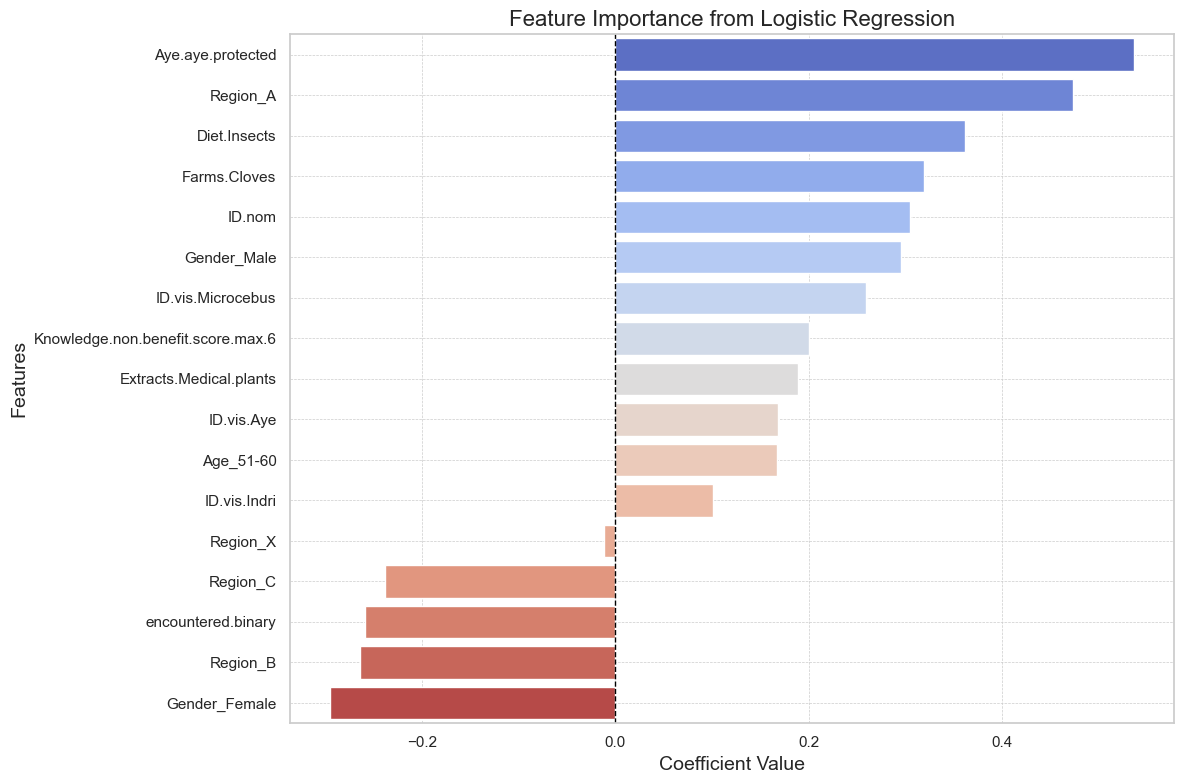

In [187]:
sf = [
    'Knowledge.non.benefit.score.max.6', 'Diet.Insects', 'Gender_Male', 'Gender_Female',
    'ID.vis.Aye', 'ID.vis.Microcebus', 'Aye.aye.protected', 'Region_B','Region_A','Region_C','Region_X', 'ID.vis.Indri',
    'encountered.binary', 'Extracts.Medical.plants', 'ID.nom', 'Age_51-60', 'Farms.Cloves'
]

# Separate the selected features and target variable
X = data_encoded[sf]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=123)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Get feature importance from Logistic Regression (coefficients)
feature_importance_logreg = pd.Series(model.coef_[0], index=sf)

# Display feature importance
print("Logistic Regression Feature Importance:")
print(feature_importance_logreg.sort_values(ascending=False))
feature_importance_logreg_sorted = feature_importance_logreg.sort_values(ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_logreg_sorted.values, y=feature_importance_logreg_sorted.index, palette="coolwarm")
plt.title('Feature Importance from Logistic Regression', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
# Add a vertical line at x=0 to separate positive and negative contributions
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

### Training XGBoost like the other pipeline for LR 

Diet.Insects                         0.137395
Gender_Male                          0.110397
Extracts.Medical.plants              0.082626
ID.vis.Microcebus                    0.071807
Region_A                             0.063269
Knowledge.non.benefit.score.max.6    0.062778
Farms.Cloves                         0.057264
Aye.aye.protected                    0.055702
Region_X                             0.053441
ID.vis.Indri                         0.052822
encountered.binary                   0.050424
Region_B                             0.046557
Age_51-60                            0.045069
ID.vis.Aye                           0.041787
ID.nom                               0.040976
Region_C                             0.027686
Gender_Female                        0.000000
dtype: float32




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



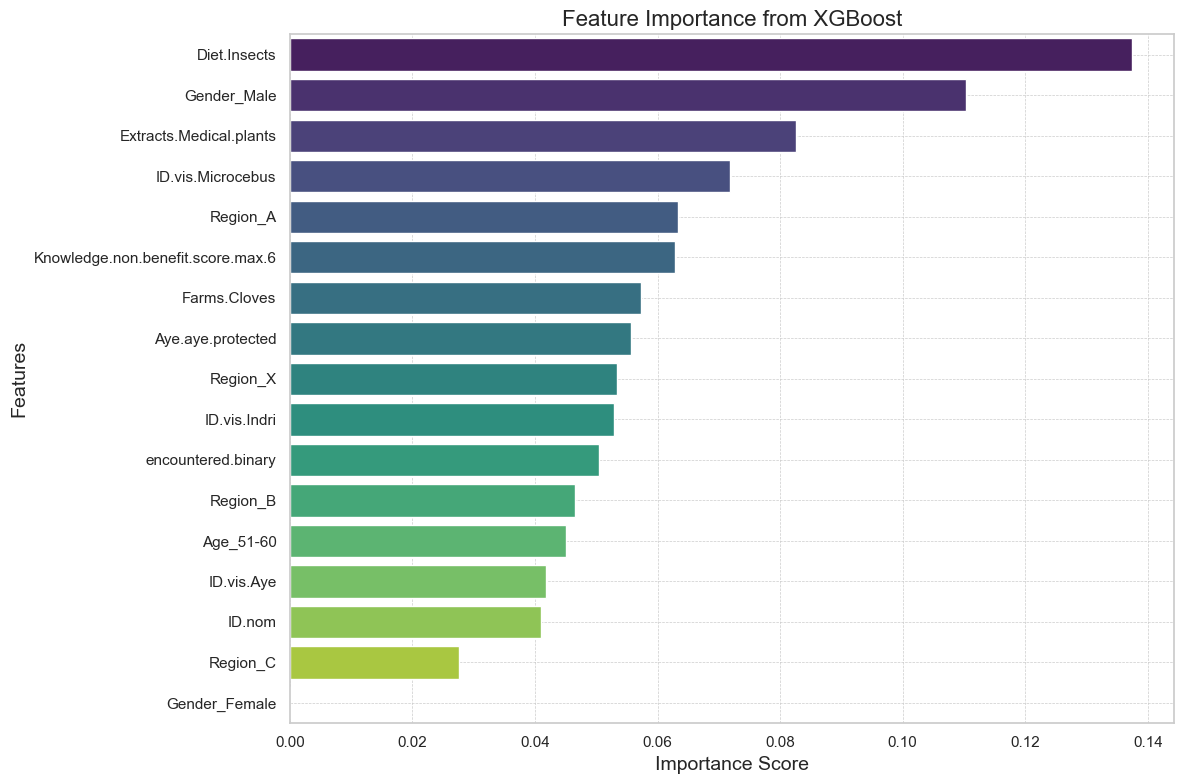

In [188]:
target = target.map({1: 0, 2: 1})
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=123)

# Training and Getting Feature Importance from XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, y_train)
xgb_importance = pd.Series(xgb_model.feature_importances_, index=sf)
xgb_importance_sorted = xgb_importance.sort_values(ascending=False)
print(xgb_importance_sorted)


# PLOTTING
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=xgb_importance_sorted.values, y=xgb_importance_sorted.index, palette="viridis")
plt.title('Feature Importance from XGBoost', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

### Random Forest Feature Importance (Pipeline the Same as LR and XGBoost)

Knowledge.non.benefit.score.max.6    0.228558
Diet.Insects                         0.092727
ID.vis.Microcebus                    0.076585
ID.vis.Indri                         0.065281
Extracts.Medical.plants              0.064740
Aye.aye.protected                    0.064110
encountered.binary                   0.054665
Gender_Male                          0.048766
ID.vis.Aye                           0.044894
Region_A                             0.041466
ID.nom                               0.040801
Age_51-60                            0.039092
Gender_Female                        0.036464
Region_B                             0.033935
Region_C                             0.031254
Farms.Cloves                         0.027526
Region_X                             0.009134
dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



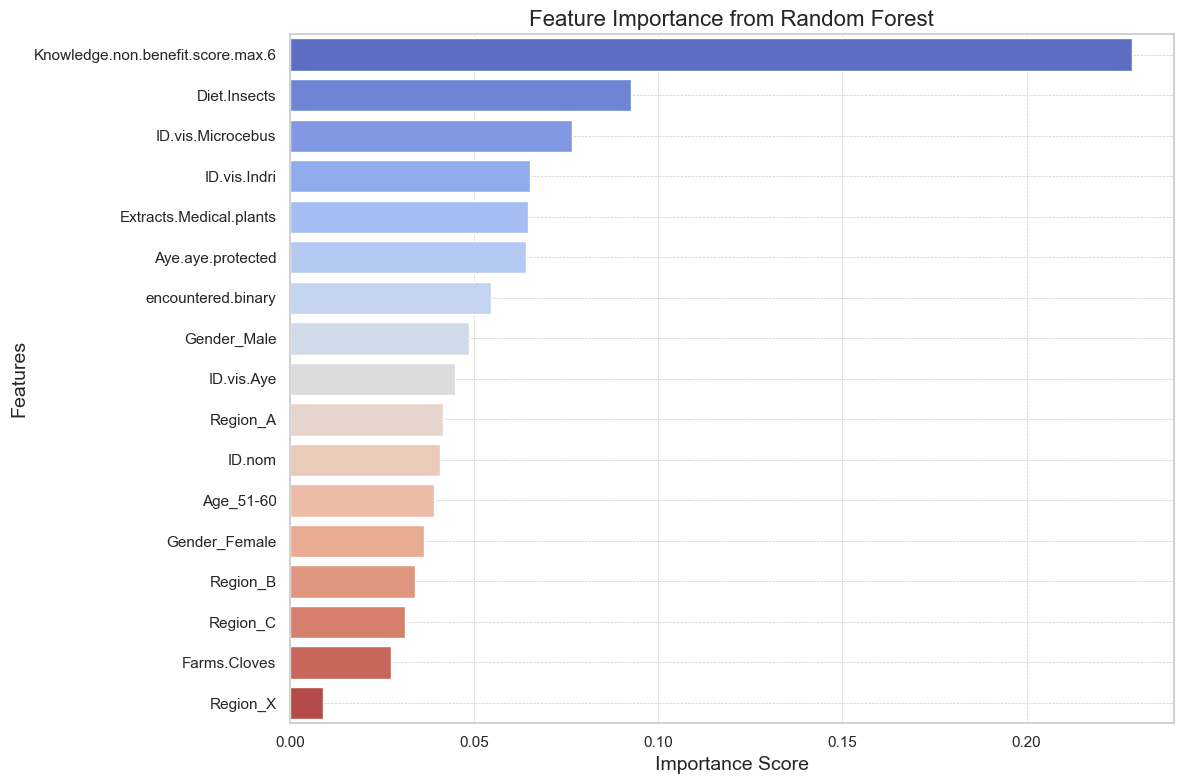

In [189]:
# Train & Get feature importance the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train, y_train)
rf_importance = pd.Series(rf_model.feature_importances_, index=sf)
rf_importance_sorted = rf_importance.sort_values(ascending=False)
print(rf_importance_sorted)
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_importance_sorted.values, y=rf_importance_sorted.index, palette="coolwarm")
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Checking Permutation Importance
<br>
Explanation: Permutation Importance assesses the importance of features by measuring the decrease in model performance when the values of a feature are randomly shuffled. This method is model-agnostic and can be used with any model.
<br>
ref: https://scikit-learn.org/stable/modules/permutation_importance.html>

Aye.aye.protected                    0.030380
Gender_Male                          0.030380
Knowledge.non.benefit.score.max.6    0.022785
Region_A                             0.017722
Diet.Insects                         0.015190
ID.nom                               0.015190
Region_B                             0.010127
ID.vis.Microcebus                    0.007595
encountered.binary                   0.007595
Region_X                             0.000000
Farms.Cloves                        -0.002532
ID.vis.Aye                          -0.005063
Region_C                            -0.010127
ID.vis.Indri                        -0.010127
Age_51-60                           -0.012658
Extracts.Medical.plants             -0.012658
Gender_Female                       -0.015190
dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



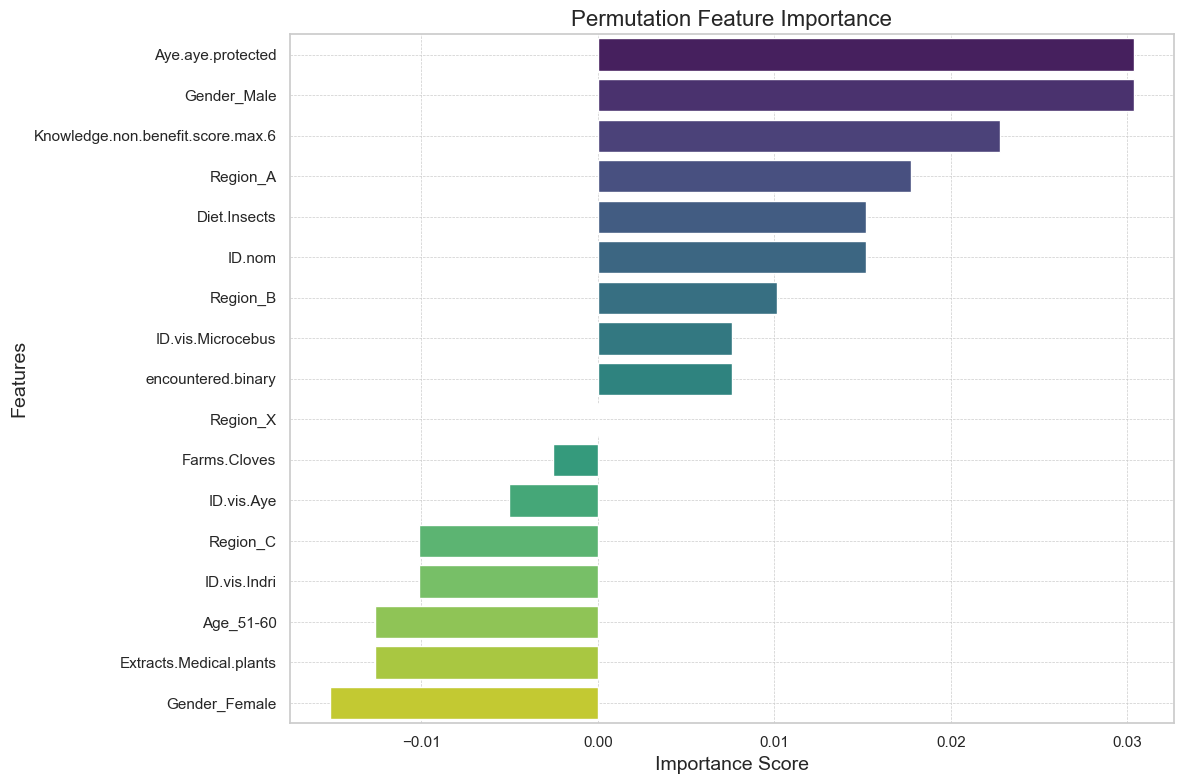

In [190]:
# Calculate permutation importance with RF model
results = permutation_importance(rf_model, X_test, y_test, scoring='accuracy')
perm_importance = pd.Series(results.importances_mean, index=sf)
perm_importance_sorted = perm_importance.sort_values(ascending=False)
print(perm_importance_sorted)
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=perm_importance_sorted.values, y=perm_importance_sorted.index, palette="viridis")
plt.title('Permutation Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Gender_Male                          1.012658e-02
Aye.aye.protected                    2.220446e-17
Gender_Female                        0.000000e+00
Region_X                             0.000000e+00
Region_A                            -5.063291e-03
Region_C                            -7.594937e-03
Diet.Insects                        -1.012658e-02
Extracts.Medical.plants             -1.012658e-02
Farms.Cloves                        -1.012658e-02
ID.vis.Microcebus                   -1.518987e-02
ID.vis.Indri                        -1.772152e-02
Region_B                            -2.025316e-02
Knowledge.non.benefit.score.max.6   -2.278481e-02
ID.nom                              -2.531646e-02
encountered.binary                  -2.784810e-02
ID.vis.Aye                          -2.784810e-02
Age_51-60                           -2.784810e-02
dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



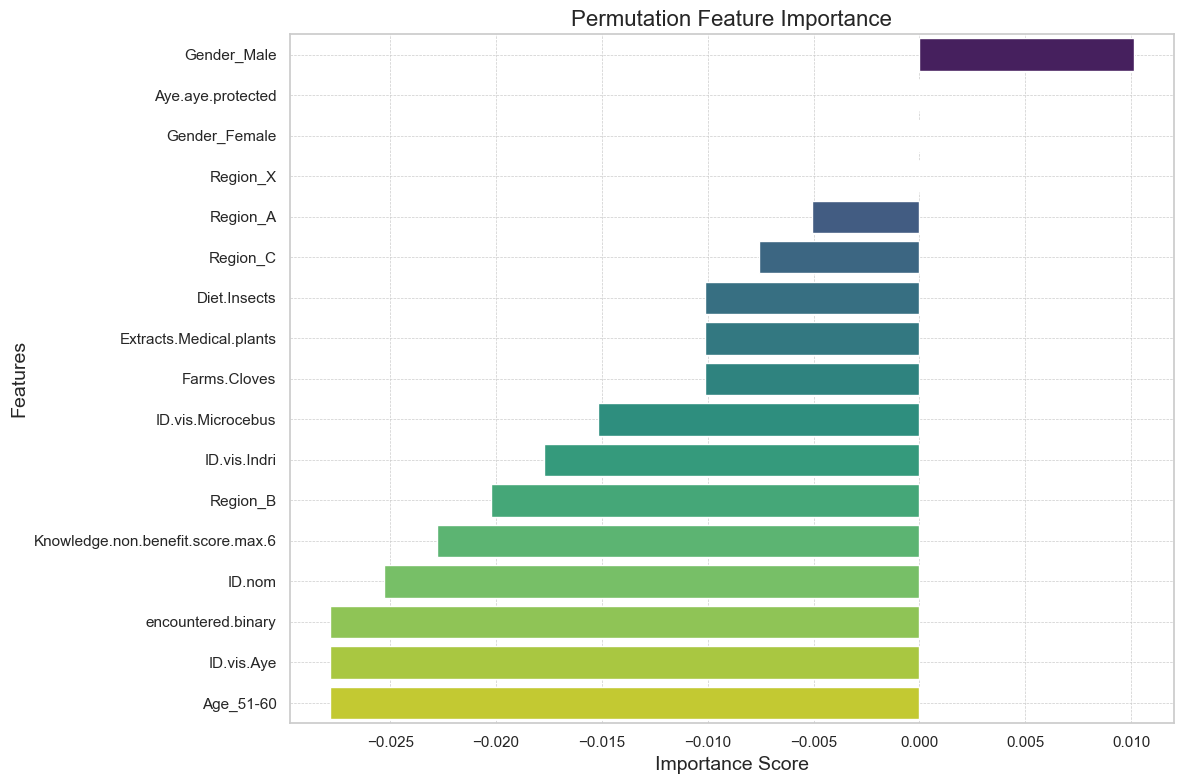

In [191]:
# Calculate permutation importance with XGboost Model
results = permutation_importance(xgb_model, X_test, y_test, scoring='accuracy')
perm_importance = pd.Series(results.importances_mean, index=sf)
perm_importance_sorted = perm_importance.sort_values(ascending=False)
print(perm_importance_sorted)
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=perm_importance_sorted.values, y=perm_importance_sorted.index, palette="viridis")
plt.title('Permutation Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#### LIME (Local Interpretable Model-agnostic Explanations)